In [1]:
%matplotlib notebook
import csv
import numpy as np
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def carga_csv(filename):
    valores = read_csv(filename,header= None).values
    return valores.astype(float)

In [3]:
val = carga_csv("ex1data1.csv")  
Y = val[:,1]
X = []
for i in range (len(Y)):
    X.append([1.,val[i,0]])
th =np.zeros((2,1))

In [4]:
def H(th,v):
    h = np.dot(v,th)
    return h

In [22]:
def J(th,x,y):
    h = H(th,x)
    s = 0
    for i in range(len(y)):
        s += (h[i] - y[i])**2
    j = s/(2*len(y))
    return j
J(th,X,Y)

array([32.07273388])

In [6]:
def gradiente(th,x,y,alpha = 0.01):
    s0 = 0
    s1 = 0
    h = H(th,x)
    for i in range(len(y)):
        s0 += h[i] - y[i]
        s1 += (h[i] - y[i])*x[i][1]
    th[0] -= (s0*alpha)/len(y)
    th[1] -= (s1*alpha)/len(y)
    return th
gradiente(th,X,Y)

array([[0.05839135],
       [0.6532885 ]])

In [7]:
for i in range(1500):
    th = gradiente(th,X,Y)

<IPython.core.display.Javascript object>


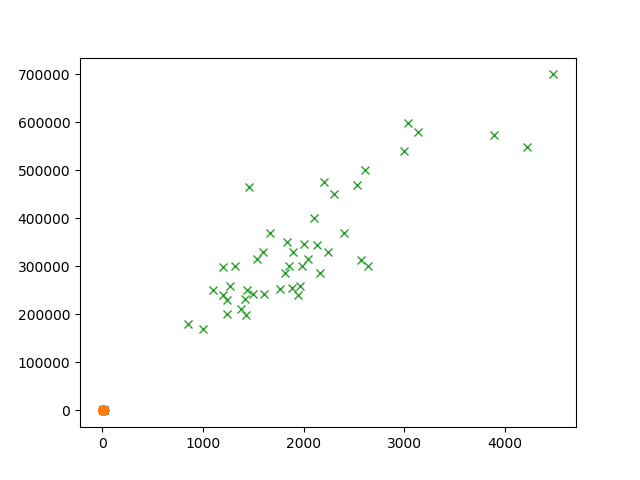

In [8]:
plt.plot()
plt.plot(val[:,0], Y, 'x')
plt.plot(val[:,0],th[0]+th[1]*val[:,0], "o-")

In [9]:
def norm(X):
    X_norm = X.copy()
    mu = [np.mean(X[:,0]),np.mean(X[:,1])]
    sigma = [np.std(X[:,0]),np.std(X[:,1])]
    for i in range(len(Y)):
        X_norm[i][0] = (X[i][0] - mu[0])/sigma[0]
        X_norm[i][1] = (X[i][1] - mu[1])/sigma[1]
    return X_norm

In [10]:
val2 = carga_csv("ex1data2.csv")
Y = val2[:,2]
X = []
X_norm = norm(val2[:,:2])
for i in range (len(Y)):
    X.append([1.,X_norm[i][0],X_norm[i][1]])
th =np.zeros((3,1))


In [11]:
def J_varios(th,x,y):
    h = H(th,x)
    aux = np.matmul(x,th)-y
    j = np.matmul(np.transpose(aux),aux)/(2*len(y))
    return j
J_varios(th,X,Y)

array([[7.9960005e+10, 6.5963505e+10, 7.3781550e+10, ..., 3.5971005e+10,
        5.9965005e+10, 4.7888025e+10],
       [6.5963505e+10, 5.4417005e+10, 6.0866550e+10, ..., 2.9674505e+10,
        4.9468505e+10, 3.9505525e+10],
       [7.3781550e+10, 6.0866550e+10, 6.8080500e+10, ..., 3.3191550e+10,
        5.5331550e+10, 4.4187750e+10],
       ...,
       [3.5971005e+10, 2.9674505e+10, 3.3191550e+10, ..., 1.6182005e+10,
        2.6976005e+10, 2.1543025e+10],
       [5.9965005e+10, 4.9468505e+10, 5.5331550e+10, ..., 2.6976005e+10,
        4.4970005e+10, 3.5913025e+10],
       [4.7888025e+10, 3.9505525e+10, 4.4187750e+10, ..., 2.1543025e+10,
        3.5913025e+10, 2.8680125e+10]])

In [12]:
def gradiente_varios(th,x,y,alpha = 0.01):
    s0 = 0
    s1 = 0
    s2 = 0
    h = H(th,x)
    for i in range(len(y)):
        s0 += h[i] - y[i]
        s1 += (h[i] - y[i])*x[i][1]
        s2 += (h[i] - y[i])*x[i][2]
    th[0] -= (s0*alpha)/len(y)
    th[1] -= (s1*alpha)/len(y)
    th[2] -= (s2*alpha)/len(y)
    return th
gradiente_varios(th,X,Y)

array([[3404.12659574],
       [1057.64133493],
       [ 547.08821756]])

In [19]:
def Inversa (x,y):
    x_trans = np.transpose(x)
    h = np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_trans,x)), x_trans), y)
    return h
Inversa(X,Y)

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [14]:
for i in range(1500):
    th = gradiente_varios(th,X,Y)
th

array([[340412.56397999],
       [109370.39878515],
       [ -6500.95717547]])

In [15]:
def prediccion(th, x, y):
    return th[0] + th[1]*x + th[2]*(y**2)

def prediccion_varios(th,x,y):
    pred = []
    for i in range (len(y)):
        pred.append(prediccion(th,x[i],y[i]))
    return pred

<IPython.core.display.Javascript object>


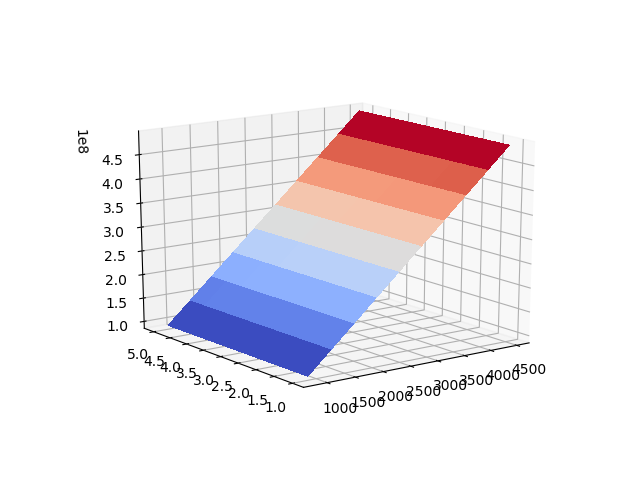

In [52]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection = '3d')
Xaxis = np.linspace(np.min(val2[:,0]),np.max(val2[:,0]),10)
Yaxis = np.linspace(np.min(val2[:,1]),np.max(val2[:,1]),10)
Xaxis, Yaxis = np.meshgrid(Xaxis, Yaxis)
#R = np.sqrt(Xaxis**2 + Yaxis**2)
Zaxis = prediccion_varios(th,Xaxis,Yaxis)
Zaxis = np.asarray(Zaxis)


#Zaxis = np.arange(np.min(val2[:,2]), np.max(val2[:,2]),30)
#ax.scatter(Xaxis, Yaxis, Zaxis, c='r', marker='o')
surf = ax.plot_surface(Xaxis, Yaxis, Zaxis, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [47]:
Xaxis = np.linspace(np.min(val2[:,0]),np.max(val2[:,0]),100)
Yaxis = np.linspace(np.min(val2[:,1]),np.max(val2[:,1]),10)
Xaxis, Yaxis = np.meshgrid(Xaxis, Yaxis)
#R = np.sqrt(Xaxis**2 + Yaxis**2)
Zaxis = prediccion_varios(th,Xaxis,Yaxis)
Zaxis = np.asarray(Zaxis)